# 🧩 Correlation Methods – Pearson, Spearman, Kendall

In [1]:
# ✅ Setup and Imports
import pandas as pd
import numpy as np
from pathlib import Path
import sys

# Setup project path
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Imports
from utils.model_utils import compute_correlations
from utils.visual_utils import plot_scatter_with_trend, save_and_show_plot

In [2]:
# Export paths
EXPORT_PLOTS = Path("../exports/plots/common_correlation")
EXPORT_TABLES = Path("../exports/tables/common_correlation")
EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

## 📊 Step 1: Generate Correlated Data

In [3]:
# Generate Correlated Data
np.random.seed(42)
x = np.linspace(0, 10, 200)
y_linear = x + np.random.normal(0, 1, size=200)
y_nonlinear = np.sin(x) + np.random.normal(0, 0.5, size=200)

df = pd.DataFrame({
    "x": x,
    "y_linear": y_linear,
    "y_nonlinear": y_nonlinear
})
df.head()

,x,y_linear,y_nonlinear
0,0.000000,0.496714,0.178894
1,0.050251,-0.088013,0.330622
2,0.100503,0.748191,0.641859
3,0.150754,1.673784,0.677084
4,0.201005,-0.033148,-0.489180


## 📈 Step 2: Visualize Scatter Plots

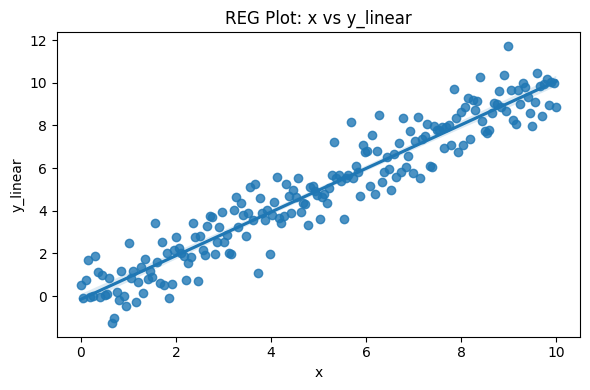

<Figure size 640x480 with 0 Axes>

In [4]:
# Visualize Scatter Plots
plot_scatter_with_trend(df, "x", "y_linear", method="reg")
save_and_show_plot("scatter_linear", EXPORT_PLOTS)

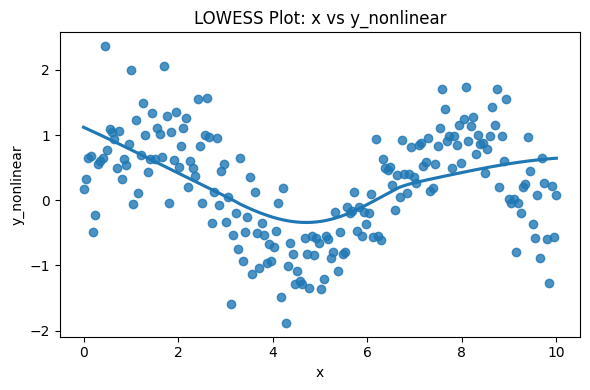

<Figure size 640x480 with 0 Axes>

In [5]:
# Visualization
plot_scatter_with_trend(df, "x", "y_nonlinear", method="lowess")
save_and_show_plot("scatter_nonlinear", EXPORT_PLOTS)

## 🧪 Step 3: Correlation Calculation

In [6]:
# Correlation Calculation
linear_corrs = compute_correlations(df, "x", "y_linear")
nonlinear_corrs = compute_correlations(df, "x", "y_nonlinear")

In [7]:
# Export correlation tables
linear_corrs.to_csv(EXPORT_TABLES / "linear_correlations.csv", index=False)
nonlinear_corrs.to_csv(EXPORT_TABLES / "nonlinear_correlations.csv", index=False)

In [8]:
# Display
display(linear_corrs)

,method,correlation,p-value
0,Pearson,0.954571,4.608582e-106
1,Spearman,0.957363,9.912734e-109
2,Kendall,0.812261,2.051841e-65


In [9]:
# Display
display(nonlinear_corrs)

,method,correlation,p-value
0,Pearson,-0.065005,0.360448
1,Spearman,-0.068859,0.332614
2,Kendall,-0.028744,0.545542


## ✅ Summary:
- Generated two relationships: linear and nonlinear
- Used Pearson, Spearman, and Kendall methods to calculate correlations
- Visualized each relationship with scatter + trend
- Exported correlations and plots for interpretation